In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('LS_2.0.csv')

In [3]:
df2.rename(columns={'CRIMINAL\nCASES': 'criminal'}, inplace=True)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   criminal                                  2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [5]:
df2.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [6]:
df2.corr()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
WINNER,1.000000,0.110294,0.725678,0.520286,0.726125,0.738976,0.757303,0.038107
AGE,0.110294,1.000000,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083
GENERAL\nVOTES,0.725678,0.208567,1.000000,0.616742,0.999988,0.962219,0.962905,0.211092
POSTAL\nVOTES,0.520286,0.129360,0.616742,1.000000,0.620614,0.630882,0.634896,0.038453
TOTAL\nVOTES,0.726125,0.208600,0.999988,0.620614,1.000000,0.962441,0.963150,0.210515
OVER TOTAL ELECTORS \nIN CONSTITUENCY,0.738976,0.207304,0.962219,0.630882,0.962441,1.000000,0.977416,0.009227
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,0.757303,0.223700,0.962905,0.634896,0.963150,0.977416,1.000000,0.072228
TOTAL ELECTORS,0.038107,0.021083,0.211092,0.038453,0.210515,0.009227,0.072228,1.000000


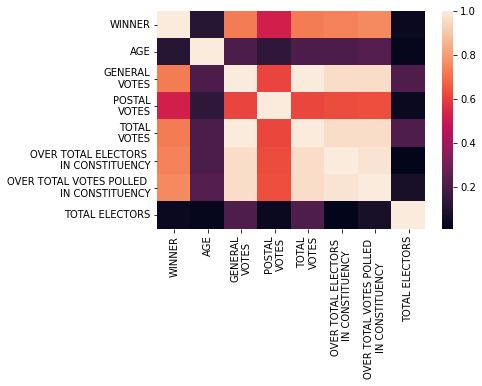

In [7]:
sns.heatmap(df2.corr())

In [ ]:
df2.isnull().values.any()

True

In [ ]:
df2['criminal'].value_counts()

0                1242
1                 313
2                 119
3                 104
4                  64
5                  42
6                  26
Not Available      22
7                  18
8                  16
10                 11
9                  11
11                  5
12                  4
14                  4
13                  3
15                  2
28                  1
52                  1
24                  1
41                  1
42                  1
16                  1
40                  1
204                 1
240                 1
31                  1
22                  1
18                  1
Name: criminal, dtype: int64

In [ ]:
df2['criminal'] = df2['criminal'].replace(['Not Available'],'0')
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')
df2['criminal'].value_counts()
df2['criminal'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
2258    False
2259    False
2260    False
2261    False
2262     True
Name: criminal, Length: 2263, dtype: bool

In [ ]:
df2['criminal'].isnull().sum().sum()

245

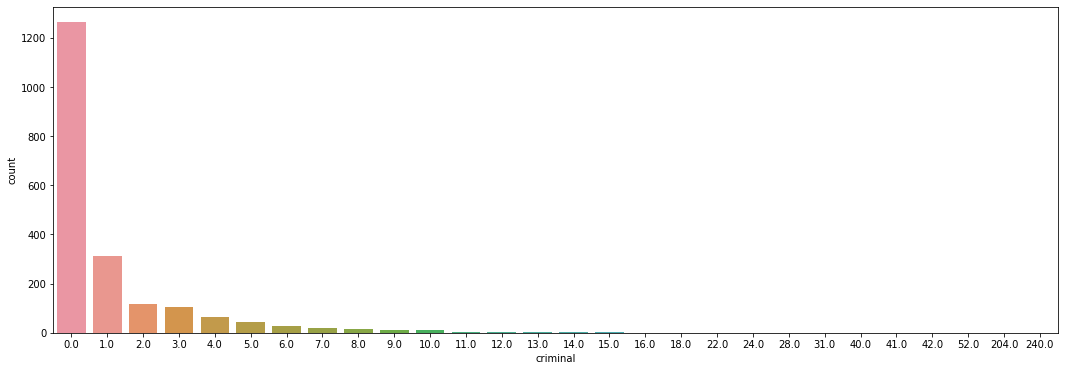

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='criminal',data=df2);

In [ ]:
df2['criminal'].describe()

count    2018.000000
mean        1.453915
std         7.636973
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       240.000000
Name: criminal, dtype: float64

In [ ]:
df2.EDUCATION.value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [ ]:
df2['EDUCATION'] = df2['EDUCATION'].replace(['Not Available','Others'],'Illiterate')
df2['EDUCATION'] = df2['EDUCATION'].replace(['Post Graduate\n'],'Post Graduate')
df2['EDUCATION'].value_counts()

Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Illiterate                77
Doctorate                 73
Literate                  30
5th Pass                  28
Name: EDUCATION, dtype: int64

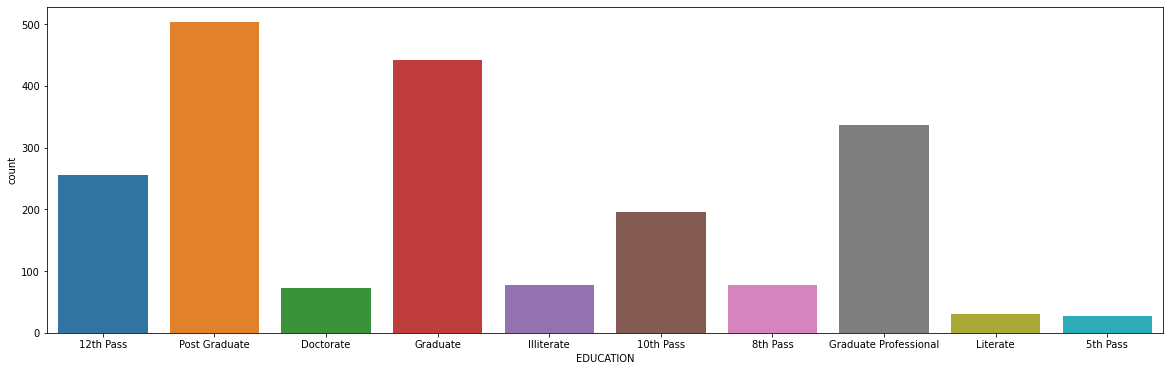

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='EDUCATION',data=df2);

In [ ]:
df2['EDUCATION'] = df2['EDUCATION'].replace(['5th Pass','8th Pass'],'Illiterate')
df2['EDUCATION'].value_counts()

Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
Illiterate               183
Doctorate                 73
Literate                  30
Name: EDUCATION, dtype: int64

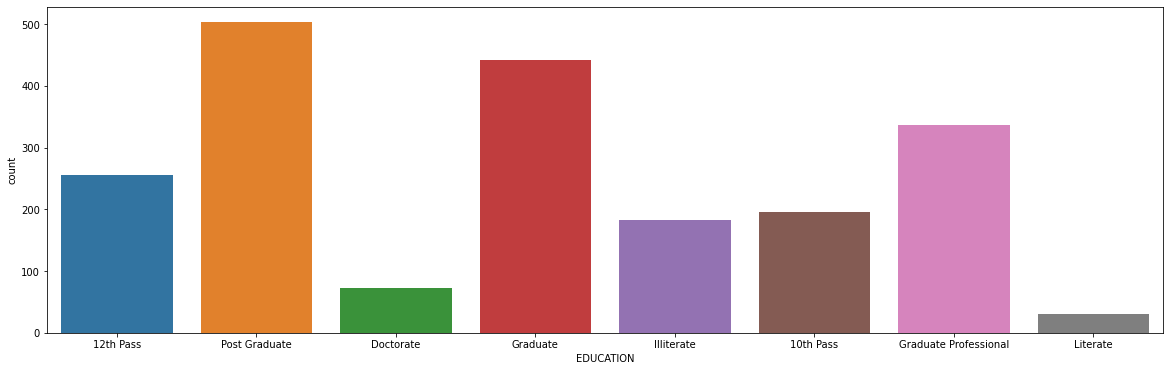

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='EDUCATION',data=df2);

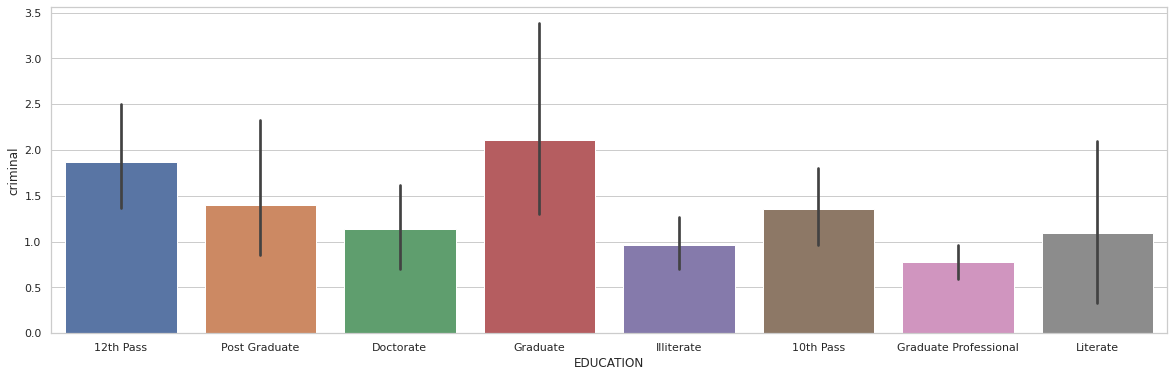

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,6))
ax = sns.barplot(x="EDUCATION", y="criminal", data=df2)

In [ ]:
cn1= int (0)
cn2= int (0)
for i in df2['GENDER']:
  if i=='MALE':
    cn1+=1
  elif i=='FEMALE':
    cn2+=1
print(cn1)
print(cn2)

1760
258


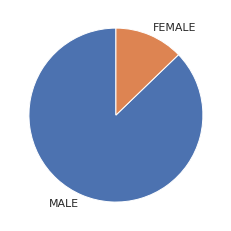

In [ ]:
y = np.array([cn1,cn2])
mylabels = ["MALE","FEMALE"]
plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

In [ ]:
state_criminal = df2.groupby('STATE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['STATE'])

state_criminal_winner = df2[df2['WINNER']>0].groupby('STATE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['STATE'])
state_criminal

,criminal
STATE,
Andhra Pradesh,81.0
Bihar,312.0
Gujarat,39.0
Jharkhand,67.0
Karnataka,44.0
Kerala,669.0
Madhya Pradesh,63.0
Maharashtra,302.0
Odisha,105.0


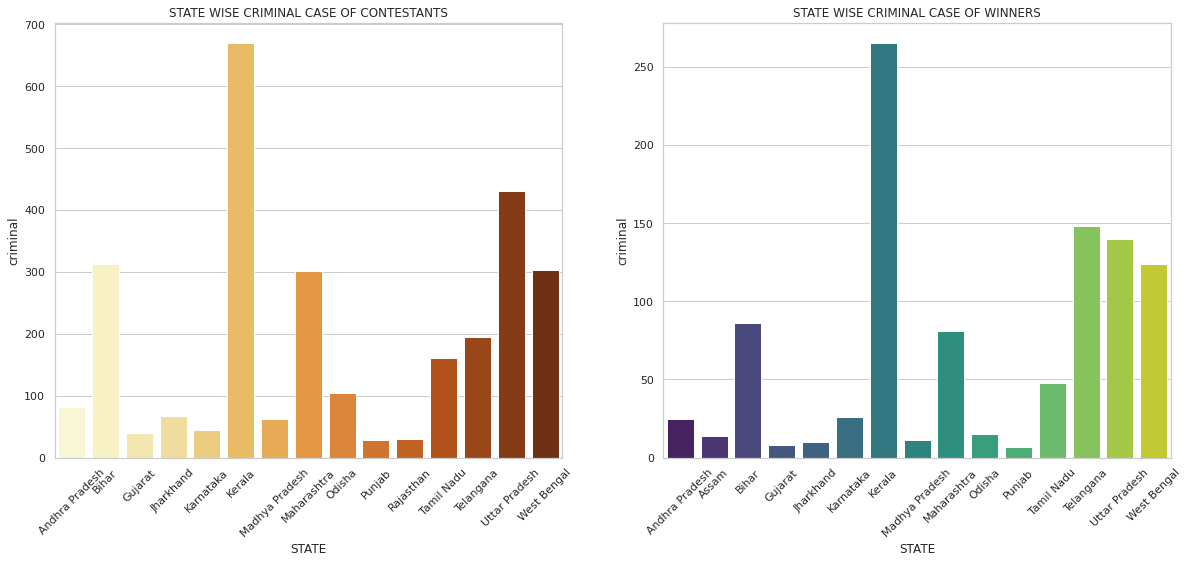

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x = state_criminal.index , y = state_criminal['criminal'] , ax=axes[0] , palette='YlOrBr');
axes[0].tick_params(axis='x' , rotation=45);
axes[0].set_title('STATE WISE CRIMINAL CASE OF CONTESTANTS');
sns.barplot(x = state_criminal_winner.index , y = state_criminal_winner['criminal'] , ax=axes[1] , palette='viridis');
axes[1].set_title('STATE WISE CRIMINAL CASE OF WINNERS');
plt.xticks(rotation=45);

In [ ]:
cn1= int (0)
cn2= int (0)
cn3= int (0)
cn4= int (0)
for i in df2['CATEGORY']:
  if i=='SC':
    cn1+=1
  elif i=='ST':
    cn2+=1
  elif i=='GENERAL':
    cn3+=1
  else:
    cn4+=1
print(cn1)
print(cn2)
print(cn3)
print(cn4)

383
243
1392
245


Text(0.5, 1.0, 'Barplot of Category in the Loksabha Election Candidates')

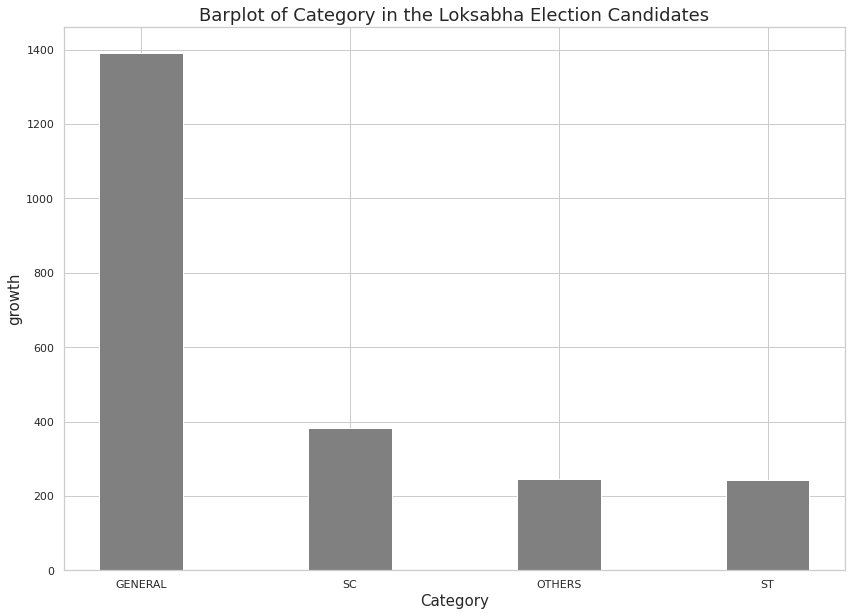

In [ ]:
consumption = ['SC','ST','GENERAL','OTHERS']
growth = [cn1,cn2,cn3,cn4]
df = pd.DataFrame({"consumption": consumption,
                   "growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='grey',
        width = 0.4)
plt.xlabel("Category", size=15)
plt.ylabel("growth", size=15)
plt.title("Barplot of Category in the Loksabha Election Candidates", size=18)

In [ ]:
cn1= int (0)
cn2= int (0)
cn3= int (0)
cn4= int (0)
cn5= int (0)
cn6= int (0)
for i in df2['PARTY']:
  if i=='BJP':
    cn1+=1
  elif i=='INC':
    cn2+=1
  elif i=='NOTA':
    cn3+=1
  elif i=='IND':
    cn4+=1
  elif i=='BSP':
    cn5+=1
  else:
    cn6+=1
    print(cn1)
print(cn2)
print(cn3)
print(cn4)
print(cn5)
print(cn6)

1
3
3
6
8
8
9
9
11
11
12
12
14
14
14
15
16
17
17
19
19
20
20
20
22
22
22
22
22
22
22
23
24
25
25
25
25
25
26
26
26
26
27
28
28
28
28
28
30
30
31
31
31
32
32
32
32
33
33
35
35
35
35
35
35
36
36
36
38
40
40
41
42
44
45
45
46
46
48
48
53
53
53
53
54
54
56
56
56
57
57
58
58
58
58
59
60
61
61
61
62
64
65
66
66
66
66
67
67
67
68
69
69
69
69
70
70
70
70
71
71
72
72
74
77
78
78
79
79
81
83
85
86
86
86
87
89
89
91
94
95
95
96
96
97
97
97
98
98
99
99
99
100
100
100
103
103
103
104
105
106
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
107
109
110
110
110
110
111
113
113
115
115
116
116
117
117
117
117
117
117
117
119
121
124
125
125
131
131
131
131
133
134
134
135
135
136
137
137
137
137
138
138
138
139
140
141
141
141
143
143
143
143
143
144
144
144
144
145
146
147
148
148
148
149
149
149
152
152
152
152
152
153
153
155
158
158
158
158
158
158
158
158
158
158
158
159
160
161
162
162
162
162
163
164
164
164
165
167
167
167
168
168
170
170
170
173
174
176
176
176
176
178
178
178
179


Text(0.5, 1.0, 'Barplot of Candidate Allocation in Loksabha Election 2019')

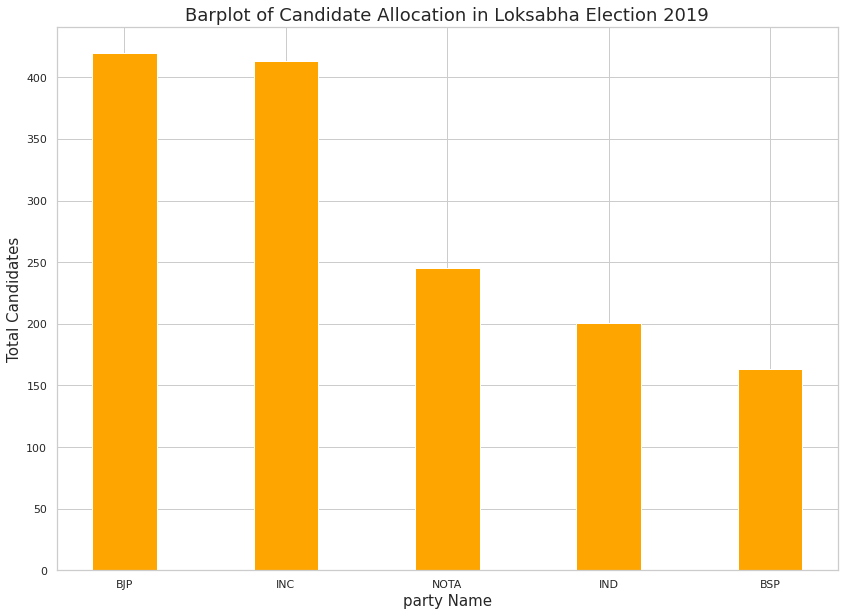

In [ ]:
consumption = ['BJP','INC','NOTA','IND','BSP']
growth = [cn1,cn2,cn3,cn4,cn5]
df = pd.DataFrame({"consumption": consumption,
                   "growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='orange',
        width = 0.4)
plt.xlabel("party Name", size=15)
plt.ylabel("Total Candidates", size=15)
plt.title("Barplot of Candidate Allocation in Loksabha Election 2019", size=18)

In [ ]:
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')


In [ ]:
party_criminal_winner = df2[df2['criminal']>0].groupby('PARTY')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['PARTY'])
party_winner = df2[(df2['criminal']>0) & (df2['WINNER']>0)].groupby('PARTY')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['PARTY'])

party_winner

,criminal
PARTY,
AIMIM,9.0
AITC,17.0
AIUDF,7.0
BJP,403.0
BSP,32.0
DMK,28.0
INC,355.0
IND,6.0
JD(U),31.0


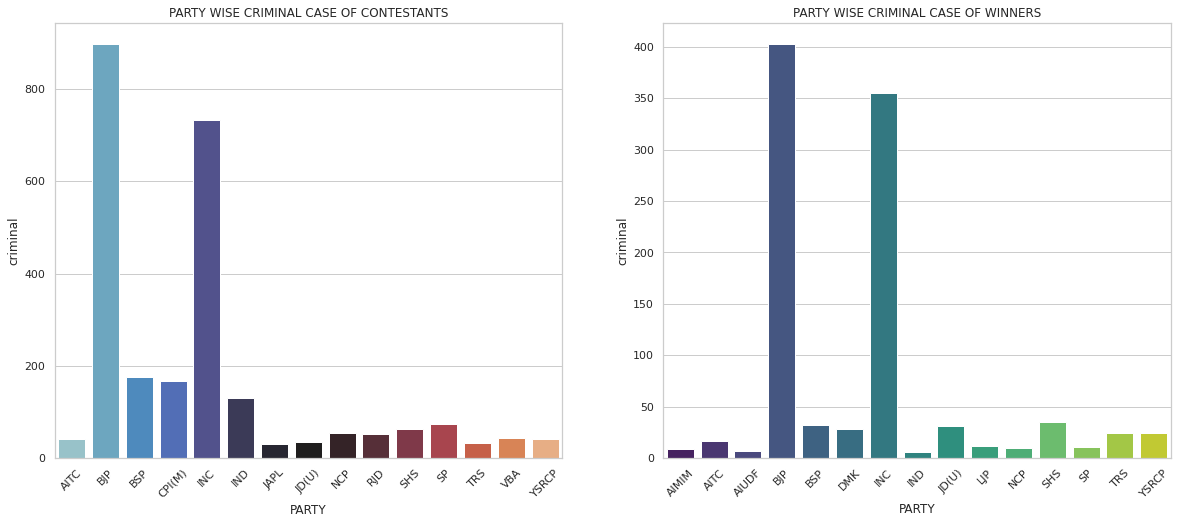

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x = party_criminal_winner.index , y = party_criminal_winner['criminal'] , ax=axes[0] , palette='icefire');
axes[0].tick_params(axis='x' , rotation=45);
axes[0].set_title('PARTY WISE CRIMINAL CASE OF CONTESTANTS');
sns.barplot(x = party_winner.index , y = party_winner['criminal'] , ax=axes[1] , palette='viridis');
axes[1].set_title('PARTY WISE CRIMINAL CASE OF WINNERS');
plt.xticks(rotation=45);

In [ ]:
age_criminal = df2[df2['criminal']>0].groupby('AGE')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['AGE'])
age_criminal

,criminal
AGE,
37.0,228.0
42.0,68.0
46.0,70.0
48.0,114.0
49.0,335.0
50.0,83.0
51.0,159.0
52.0,143.0
54.0,104.0


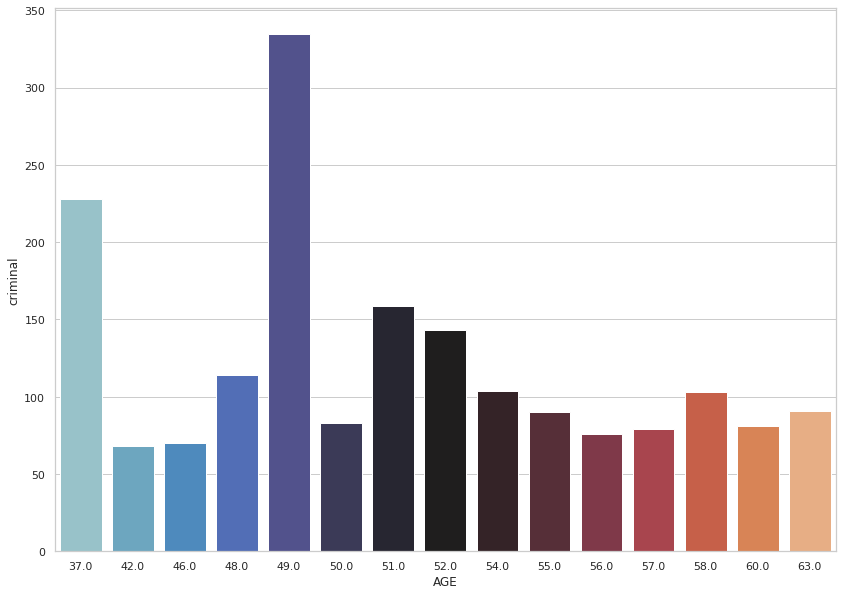

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(x = age_criminal.index , y = age_criminal['criminal'] , palette='icefire');

In [ ]:
total_voter1 = df2[df2['TOTAL\nVOTES']>0].groupby('STATE')[['TOTAL\nVOTES']].sum().sort_values(by=
                        ['TOTAL\nVOTES']).tail(15).sort_values(by=['STATE'])

total_voter1

,TOTAL\nVOTES
STATE,
Andhra Pradesh,30968703
Assam,17441534
Bihar,38755595
Gujarat,28158684
Jharkhand,14253127
Karnataka,33859226
Kerala,20010727
Madhya Pradesh,35580595
Maharashtra,52287234


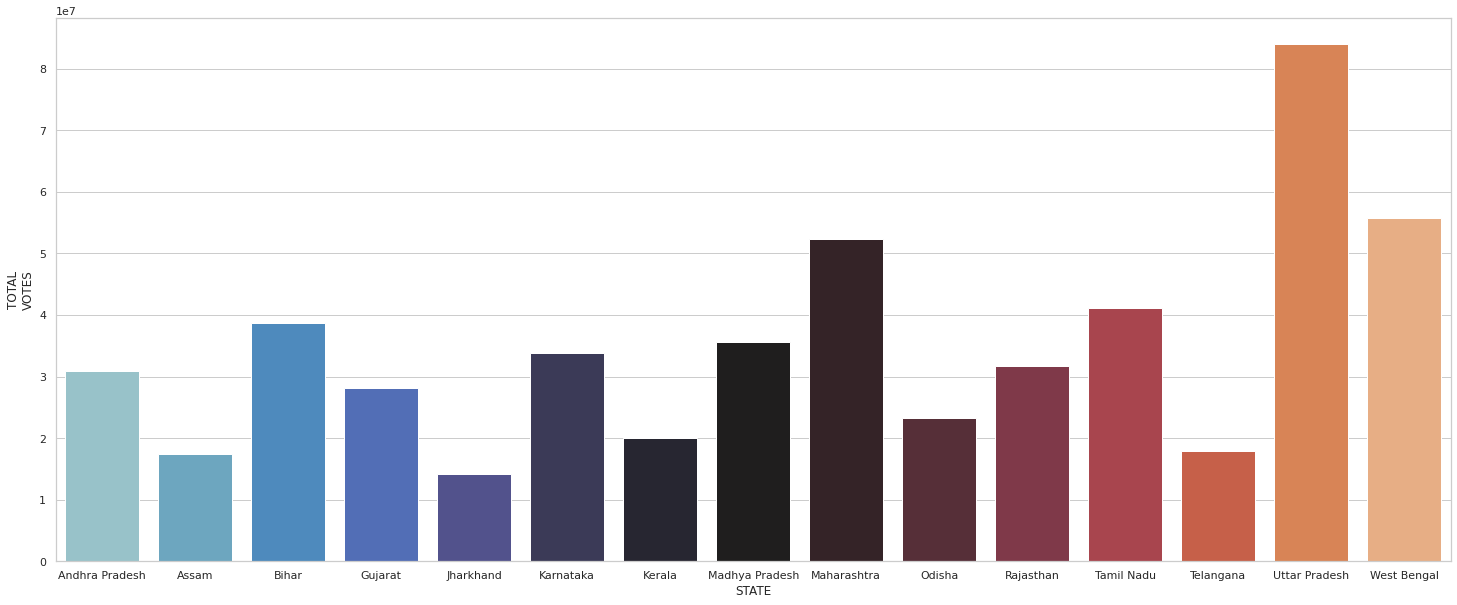

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x = total_voter1.index , y = total_voter1['TOTAL\nVOTES'] , palette='icefire');

In [ ]:
fm = df2.groupby(['GENDER','WINNER'])[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['GENDER'])

fm

criminal
GENDER WINNER          
FEMALE 1           65.0
       0          171.0
MALE   1          964.0
       0         1734.0

In [ ]:
party_winner1 = df2[(df2['criminal']>0) & (df2['WINNER']>0)].groupby('GENDER')[['criminal']].sum().sort_values(by=
                        ['criminal']).tail(15).sort_values(by=['GENDER'])
party_winner1

,criminal
GENDER,
FEMALE,65.0
MALE,964.0


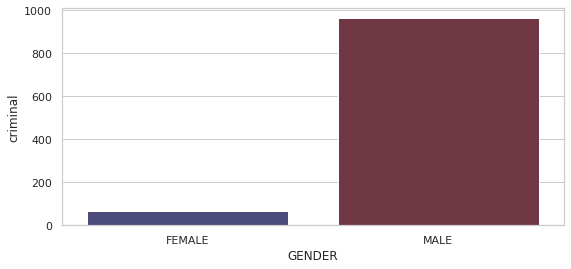

In [ ]:
plt.figure(figsize=(9,4))
sns.barplot(x = party_winner1.index , y = party_winner1['criminal']  , palette='icefire');

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig = px.scatter(df2, 
                 x='AGE', 
                 y='criminal', 
                 color='WINNER', 
                 opacity=0.8, 
                 hover_data=['GENDER','CATEGORY','STATE','PARTY','NAME','EDUCATION'], 
                 title='Age vs Crime vs Winner vs Gender vs Category vs State vs Party vs Education')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df=df2[df2.EDUCATION=='Doctorate']
df.shape

(73, 19)

In [ ]:
df=df[df.WINNER==1]
df.shape

(23, 19)

In [ ]:
df1=df[(df.PARTY=='BJP') & (df.WINNER==1)]
df1.shape

(14, 19)

In [ ]:
Female_winners = df2[(df2['WINNER']==1) & (df2['GENDER']=='FEMALE')]
ax = px.histogram(Female_winners, 'STATE', title = 'Female Winners from different States',width=1150,height=700)
ax.show()

In [ ]:
fig = px.violin(df2, 
                 x='AGE', 
                 y='criminal', 
                 color='WINNER', 
                 
                 hover_data=['GENDER','CATEGORY','STATE','PARTY','NAME','EDUCATION'], 
                 title='Age vs Crime vs Winner vs Gender vs Category vs State vs Party vs Education')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(df2, 
                 x="AGE", 
                 y="EDUCATION", 
                 animation_frame="STATE", 
                 animation_group="PARTY",
                   color="PARTY", 
                 hover_name="CONSTITUENCY",
                 log_x=True, 
                 size_max=80, 
                 range_x=[20,90], 
                 range_y=[0,7])

fig.show()

In [ ]:
sns.heatmap(df2.corr())

NameError: ignored